# Some title

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.optimize import minimize 
from datetime import timedelta
from IPython.display import Image
import requests

## Data

### Brazil

#### COVID-19 DATA

Data source: [Brasil.IO](https://brasil.io/dataset/covid19/caso). 



In [30]:
url = "https://brasil.io/dataset/covid19/caso/?format=csv"
filename = 'data/brazil_' + url.split("/")[-3] + '.csv'
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)

In [31]:
df = pd.read_csv(filename)
df.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-05-10,AL,Anadia,city,2,1,True,17545.0,2700201.0,11.39926,0.5000
1,2020-05-10,AL,Arapiraca,city,39,5,True,231747.0,2700300.0,16.82870,0.1282
2,2020-05-10,AL,Atalaia,city,10,0,True,47185.0,2700409.0,21.19318,0.0000
3,2020-05-10,AL,Barra de Santo Antônio,city,1,0,True,15932.0,2700508.0,6.27668,0.0000
4,2020-05-10,AL,Barra de São Miguel,city,5,0,True,8322.0,2700607.0,60.08171,0.0000


Select a particular state or city:

In [32]:
state_or_city = 'state'
name = 'SP'

df = df[ df['place_type'] == state_or_city]
df = df[ df[state_or_city] == name ]

df_I = df.groupby('date')[['confirmed']].sum()
df_I.index = pd.to_datetime(df_I.index)
today = df_I.index[-1] + timedelta(days=1)

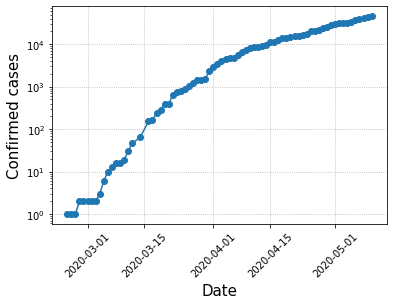

In [35]:
fig, ax = plt.subplots()
ax.plot(df_I, 'o-', color= 'C0')
ax.set_yscale('log')
ax.grid(linestyle=':')
ax.set_xlabel('Date', fontsize= 15)
ax.set_ylabel('Confirmed cases', fontsize= 15)
plt.xticks(rotation=45)
plt.show()

In [36]:
today = df_I.index[-1] + timedelta(days=1)

#### Population data combined with ICU adimission probability by age

Data source: [IBGE](https://www.ibge.gov.br/apps/populacao/projecao/).

In [37]:
file = 'data/pop_age_str_IBGE_2020_' + name + '.csv'

df_age = pd.read_csv(file)
df_age.loc[0, 'Age'] = '00-04'
df_age.loc[1, 'Age'] = '05-09'
df_age['AGE_prob'] = df_age['Total'] / df_age['Total'].sum()

pop0 = df_age['Total'].sum()

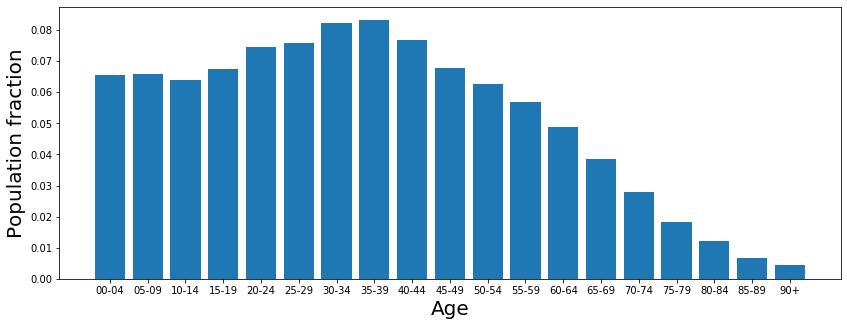

In [38]:
fig, ax = plt.subplots(figsize= (14, 5 ))
ax.bar(df_age['Age'], df_age['AGE_prob'])
ax.set_xlabel('Age', fontsize= 20)
ax.set_ylabel('Population fraction', fontsize= 20)
plt.show()

Data source: [Severe Outcomes Among Patients with Coronavirus Disease 2019 (COVID-19) — United States, February 12–March 16, 2020](https://www.cdc.gov/mmwr/volumes/69/wr/mm6912e2.htm?s_cid=mm6912e2_w) by [CDC](https://www.cdc.gov/).

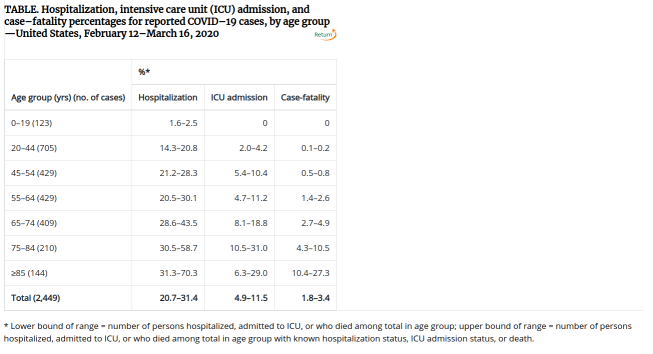

In [39]:
Image(filename= 'results/figures/CDC_ICU_age.png') 

In [40]:
ICU_prob = [0., 0., 0., 0., 0.042, 
            0.042, 0.042, 0.042, 0.042, 0.104,
            0.104, 0.112, 0.112, 0.188, 0.188,
            0.31, 0.31, 0.29, 0.29]

df_age['ICU_prob'] = ICU_prob

### World

#### COVID-19 data

Data source: [Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data).

In [41]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
filename = 'data/world_' + url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)

In [42]:
df_W = pd.read_csv(filename)
df_W = df_W[df_W.location != 'Hong Kong']
df_W = df_W[df_W['iso_code'].notna()]
df_W.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


We focus on two scenarios defined on the notebook (bla).

## Fit sigmoid over data

$$ n(t) =  \frac{n^{*}}{1 + e^{-\alpha(t - t_0)}} \equiv S(t) \hat{n}(t)  \; \; \, $$

where $S(t)$ is a subnotification factor, $t_0$ is the time from which the fit is performed.



In [43]:
country1 = 'Spain'
country2 = 'Germany'

frac1 = list(df_W[ df_W['location'] == country1]['total_cases_per_million'])[-1] / 10**6
frac2 = list(df_W[ df_W['location'] == country2]['total_cases_per_million'])[-1] / 10**6

n_star1 = (frac1 * pop0).item()
n_star2 = (frac2 * pop0).item()

### Linear regression over $\log(n^{*} / n(t)  - 1 )$

In [44]:
S = 1

X_ = np.arange(len(df_I))
X = X_.reshape(-1, 1)

# The model is fitted with a subnotification factor
y1 = np.log( n_star1 / np.array( S * df_I) - 1. )
y1 = y1.reshape(len(df_I)).reshape(-1, 1)

y2 = np.log( n_star2 / np.array( S * df_I) - 1. )
y2 = y2.reshape(len(df_I)).reshape(-1, 1)

In [45]:
t0 = 45

model1 = linear_model.LinearRegression()
model2 = linear_model.LinearRegression()

model1.fit(X[t0:], y1[t0:])
model2.fit(X[t0:], y2[t0:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

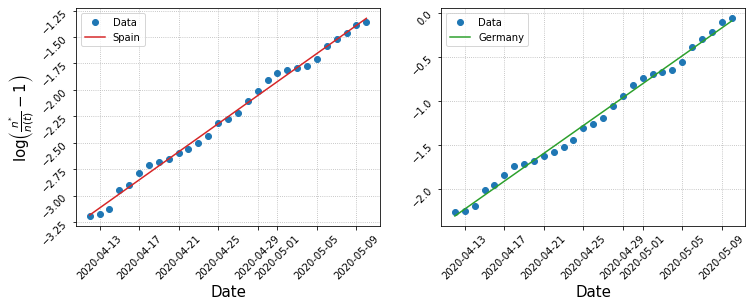

In [46]:
fig, axs = plt.subplots(1, 2, figsize= (12, 4))

axs[0].plot(df_I.index[t0:], -y1[t0:], 'o', color= 'C0', label= 'Data')
axs[0].plot(df_I.index[t0:], -model1.predict(X)[t0:], color= 'C3', label= 'Spain')
axs[0].grid(linestyle=':')
axs[0].set_xlabel('Date', fontsize= 15)
axs[0].set_ylabel('$ \\log \\left( \\frac{n^{*}}{n(t)} - 1 \\right) $', fontsize= 15)
axs[0].tick_params(labelrotation= 45)
axs[0].legend()

axs[1].plot(df_I.index[t0:], -y2[t0:], 'o', color= 'C0', label= 'Data')
axs[1].plot(df_I.index[t0:], -model2.predict(X)[t0:], color= 'C2', label= 'Germany')
axs[1].grid(linestyle=':')
axs[1].set_xlabel('Date', fontsize= 15)
axs[1].tick_params(labelrotation= 45)
axs[1].legend()
plt.show()

### Number of infected projections

In [47]:
def sigmoid(t, t0, alpha, n_star):
    return n_star / (1. + np.exp(-alpha*(t-t0)))

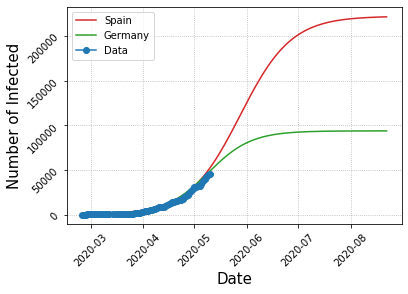

In [48]:
X__ = np.arange(0, 180)

start = df_I.index[0]
end = pd.to_datetime(start, format='%Y/%m/%d') + pd.DateOffset(days= len(X__) - 1)
time = pd.date_range(start, end, freq='D')

n1 = sigmoid(X__, t0= -model1.intercept_[0] / model1.coef_[0][0], alpha= -model1.coef_[0][0], n_star= n_star1)
n2 = sigmoid(X__, t0= -model2.intercept_[0] / model2.coef_[0][0], alpha= -model2.coef_[0][0], n_star= n_star2)


fig, ax = plt.subplots()

ax.plot(time, 
        sigmoid(X__, t0= -model1.intercept_[0] / model1.coef_[0][0], alpha= -model1.coef_[0][0], n_star= n_star1), 
        color= 'C3', label= country1)


ax.plot(time, 
        sigmoid(X__, t0= -model2.intercept_[0] / model2.coef_[0][0], alpha= -model2.coef_[0][0], n_star= n_star2), 
        color= 'C2', label= country2)

ax.plot(df_I.index, np.array(S * df_I['confirmed']), 'o-', color= 'C0', label= 'Data')

ax.grid(linestyle=':')
ax.set_xlabel('Date', fontsize= 15)
ax.set_ylabel('Number of Infected', fontsize= 15)
ax.tick_params(labelrotation= 45)
ax.legend()
plt.show()

In [49]:
df_I['confirmed']

date
2020-02-25        1
2020-02-26        1
2020-02-27        1
2020-02-28        2
2020-02-29        2
              ...  
2020-05-06    37853
2020-05-07    39928
2020-05-08    41830
2020-05-09    44411
2020-05-10    45444
Name: confirmed, Length: 74, dtype: int64

## Sampling from age-structed population probability and ICU admission probability

First, a example for a fixed `samp_size` value will be given. After that, we construct a funcion that performes the sampling over time Define below the number of samples for each age interval and the sample size.

### Example for fixed sample size

#### Sampling from age-dependent probability

In [50]:
n_samp = 1000
samp_size = 10000

In [51]:
df_samp = pd.DataFrame(columns= df_age['Age'])

for j in range(n_samp):
    
    samp = np.random.choice(df_age['Age'], 
                            samp_size, 
                            p= list(df_age['AGE_prob']) )

    unique, count = np.unique(samp, return_counts= True)
    
    for l in range(len(unique)):
        df_samp.loc[j, unique[l]] = count[l]
        
df_samp = df_samp.fillna(0)

df_age['n_mean'] = list(df_samp.mean(axis= 0))
df_age['n_std']  = list(df_samp.std(axis =0))

#### Sampling from age-dependent ICU admission

In [52]:
n_sample_per_age = 1000
df_age = df_age.set_index('Age')

for age in unique:
    
    aux_ = []
    for j in range(n_samp):      
    
        samp = np.random.uniform(size= int(df_age.loc[age]['n_mean']))  
        samp_ICU = samp < df_age.loc[age]['ICU_prob']
        aux_.append(samp_ICU.sum())

    df_age.loc[age, 'n_mean_ICU']  = np.mean(aux_)
    df_age.loc[age, 'n_std_ICU']   = np.std(aux_)

Uncertainty in ICU sampling must be combined to uncertaintiy in age sampling.

In [53]:
df_age['n_std_ICU'] = np.sqrt( df_age['n_std_ICU']**2 +  df_age['n_std']**2)

In [54]:
df_age

,Total,AGE_prob,ICU_prob,n_mean,n_std,n_mean_ICU,n_std_ICU
Age,,,,,,,
00-04,3038361,0.065638,0.000,656.661,25.619806,0.000,25.619806
05-09,3042098,0.065719,0.000,656.671,24.707392,0.000,24.707392
10-14,2957679,0.063895,0.000,639.539,23.947274,0.000,23.947274
15-19,3127121,0.067556,0.000,675.272,25.115549,0.000,25.115549
20-24,3448513,0.074499,0.042,745.122,26.615099,31.574,27.226752
25-29,3511090,0.075851,0.042,759.244,25.686928,31.916,26.248147
30-34,3809963,0.082308,0.042,824.067,27.525809,34.723,28.105773
35-39,3854180,0.083263,0.042,831.515,27.878791,34.680,28.470206
40-44,3548754,0.076665,0.042,765.779,26.708004,32.233,27.325303


### Sampling over time

By making use of the example above, we construct a function to be used to performe both sampling over time.

In [55]:
def ICU_samp(df, n, n_samp= 1000):

    df_samp = pd.DataFrame(columns= df['Age'])

    for j in range(n_samp):
    
        samp = np.random.choice(df['Age'], 
                                n, 
                                p= list(df['AGE_prob']) )

        unique, counts = np.unique(samp, return_counts= True)
    
        for l in range(len(unique)):
            df_samp.loc[j, unique[l]] = counts[l]
        

    df_samp = df_samp.fillna(0)
    df['n_mean'] = list(df_samp.mean(axis= 0))
    df['n_std']  = list(df_samp.std(axis =0))

    df = df.set_index('Age')

    for age in df.index:
    
        aux_ = []

        for j in range(n_samp):      
    
            samp = np.random.uniform(size= int(df.loc[age]['n_mean']))  
            samp_ICU = samp < df.loc[age]['ICU_prob']
            aux_.append(samp_ICU.sum())

        df.loc[age, 'n_mean_ICU']  = np.mean(aux_)
        df.loc[age, 'n_std_ICU']   = np.std(aux_)
        
    df['n_std_ICU'] = np.sqrt( df['n_std']**2 +  df['n_std_ICU']**2)
    
    return df

In [56]:
df_age

,Total,AGE_prob,ICU_prob,n_mean,n_std,n_mean_ICU,n_std_ICU
Age,,,,,,,
00-04,3038361,0.065638,0.000,656.661,25.619806,0.000,25.619806
05-09,3042098,0.065719,0.000,656.671,24.707392,0.000,24.707392
10-14,2957679,0.063895,0.000,639.539,23.947274,0.000,23.947274
15-19,3127121,0.067556,0.000,675.272,25.115549,0.000,25.115549
20-24,3448513,0.074499,0.042,745.122,26.615099,31.574,27.226752
25-29,3511090,0.075851,0.042,759.244,25.686928,31.916,26.248147
30-34,3809963,0.082308,0.042,824.067,27.525809,34.723,28.105773
35-39,3854180,0.083263,0.042,831.515,27.878791,34.680,28.470206
40-44,3548754,0.076665,0.042,765.779,26.708004,32.233,27.325303


Running the function over both scenarios:

In [57]:
df1_ = []
df2_ = []

for j in range(len(n1)):
    
    df1 = ICU_samp(df_age.reset_index(), 
                   int(n1[j]), n_samp= 100)

    df2 = ICU_samp(df_age.reset_index(), 
                   int(n2[j]), n_samp= 100)
    
    df1_.append(df1)
    df2_.append(df2)

### Taking into account removal from ICU after `T_ICU` days

In [58]:
def correction(x, df_, T_ICU= 14):

    df_[x]['n_mean_ICU_cor'] = 0.
    df_[j]['n_std_ICU_cor'] = 0.
    
    if x <= T_ICU:
                   
        df_[x]['n_mean_ICU_cor'] = df_[x]['n_mean_ICU']
        df_[x]['n_std_ICU_cor']   = df_[x]['n_std_ICU']
             
    else:
        
        delta = df_[x]['n_mean_ICU'] - df_[x - T_ICU]['n_mean_ICU']
        
        df_[x]['n_mean_ICU_cor'] = np.heaviside(delta, 0) * delta
        df_[x]['n_std_ICU_cor']  = np.sqrt(df_[x]['n_std_ICU']**2 + df_[x - T_ICU]['n_std_ICU']**2)

In [59]:
T_ICU = 14

for x in range(len(df1_)):
    
    correction(x, df_= df1_, T_ICU= T_ICU)
    correction(x, df_= df2_, T_ICU= T_ICU)

## Collecting daily averages

Given a list `df_` of dataframes, the function `daily_av` collect averages of collumns values over a `timeseries_data` period. The return is a daaframe called `df_ICU`.

In [60]:
def daily_av(df_, timeseries_data, SUS= True, p_SUS= 0.6278, n_samp= 1000):

    n_mean_    = []
    n_std_     = []
    n_mean_ICU_ = []
    n_std_ICU_  = []

    for j in range(len(df_)):

        n_mean_.append(df_[j]['n_mean'].sum())
        n_std_.append( np.sqrt((df_[j]['n_std']**2).sum()) )
        
        n_mean_ICU_.append(df_[j]['n_mean_ICU_cor'].sum())
        n_std_ICU_.append( np.sqrt((df_[j]['n_std_ICU_cor']**2).sum()) )

    names = ['date', 'n_mean', 'n_std', 'n_mean_ICU', 'n_std_ICU']
    df_ICU = pd.DataFrame(columns= names)
    df_ICU['date'] = timeseries_data

    df_ICU['n_mean']     = n_mean_ 
    df_ICU['n_std']      = n_std_
    df_ICU['n_mean_ICU'] = n_mean_ICU_
    df_ICU['n_std_ICU']  = n_std_ICU_

    df_ICU = df_ICU.set_index(['date'])


    if SUS:

        for date in df_ICU.index:
            
            aux_ = []
            for j in range(n_samp):

                samp = np.random.uniform(size= int(df_ICU.loc[date]['n_mean_ICU']))  
                SUS_samp = samp <= p_SUS
                aux_.append(SUS_samp.sum())

            df_ICU.loc[date, 'n_mean_ICU_SUS'] = np.mean(aux_)
            df_ICU.loc[date, 'n_std_ICU_SUS']  = np.std(aux_)

        df_ICU['n_std_ICU_SUS'] = np.sqrt( df_ICU['n_std_ICU']**2 +  df_ICU['n_std_ICU_SUS']**2)

    return df_ICU

In [64]:
df1_ICU = daily_av(df1_, timeseries_data= time, SUS= True, p_SUS= 0.6278, n_samp= 100)
df2_ICU = daily_av(df2_, timeseries_data= time, SUS= True, p_SUS= 0.6278, n_samp= 100)

In [70]:
time

DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05',
               ...
               '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16',
               '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20',
               '2020-08-21', '2020-08-22'],
              dtype='datetime64[ns]', length=180, freq='D')

#### Saving the results. 

In [80]:
file1 = 'results/dfs/df_ICU_' + state_or_city + '_' + name + '_' + country1 + '_t0=' + str(t0) + '.pkl'
file2 = 'results/dfs/df_ICU_' + state_or_city + '_' + name + '_' + country2 + '_t0=' + str(t0) + '.pkl'


df1_ICU.to_pickle(file1) 
df2_ICU.to_pickle(file2) 

## Plots


In [76]:
df_ICU_data = pd.DataFrame(columns= ['date', 'n_data_ICU'])
df_ICU_data['date'] = time
df_ICU_data = df_ICU_data.set_index(['date'])


df_ICU_data.loc['2020-05-08', 'n_data_ICU'] = 3474 
df_ICU_data.loc['2020-04-14', 'n_data_ICU'] = 1111
df_ICU_data.loc['2020-05-04', 'n_data_ICU'] = 3534
df_ICU_data.loc['2020-04-15', 'n_data_ICU'] = 1132
df_ICU_data.loc['2020-04-17', 'n_data_ICU'] = 2275
df_ICU_data.loc['2020-04-20', 'n_data_ICU'] = 2345
######
df_ICU_data.loc['2020-04-29', 'n_data_ICU'] = 2088

In [363]:
def plot_scenarios(df1, df2, dfdata, country1, country2, ylim= 10000, capacity= 5274, file_s= 'state_SP', Z= 1., save= False, pdf= False):

    fig, ax = plt.subplots()

    df1.index = pd.to_datetime(df1.index)
    df2.index = pd.to_datetime(df2.index)
    dfdata.index = pd.to_datetime(dfdata.index)

    ############################################################################
    ###### SUBNOTIFICATION FACTOR

    df1_data = df1.loc[dfdata[dfdata['n_data_ICU'].notnull()].index]
    df2_data = df2.loc[dfdata[dfdata['n_data_ICU'].notnull()].index]
    dfdata_data = dfdata.loc[dfdata[dfdata['n_data_ICU'].notnull()].index]

    def error_(x):
        median = np.median([df1_data['n_mean_ICU'], df2_data['n_mean_ICU']], axis=0)
        error = ((dfdata_data['n_data_ICU'] - x*median)**2).sum()
        return error


    sub = minimize(error_, x0=10).x[0]

    ###############################
    ######## MEDIAN

    df_median = pd.DataFrame(columns= ['median'])

    df_median['median'] = np.median([df1['n_mean_ICU'], df2['n_mean_ICU']], axis=0)
    df_median.index = pd.to_datetime(df1.index)
    ax = (sub*df_median['median'][today:]).plot(color= 'gold', label= 'Median', linewidth= 2.5)

    ymaxm   = sub*(df_median.loc[df_median['median'].idxmax()].loc['median'])

    colapse_m = df_median[ sub*df_median['median'] > capacity ].index.tolist()
    if len(colapse_m) > 0:
        colapse_datem = colapse_m[0].strftime('%Y-%m-%d')
    else:
        colapse_datem = 'no colapse'

    
    ############################################################################
    ###### DATA
    ax = dfdata['n_data_ICU'].plot(marker= 'o', color= 'C1', label= 'Data')

    ############################################################################
    ###### AFTER TODAY
    ax = (sub*df1['n_mean_ICU'][today:]).plot(label= country1, color= 'C3')

    ax.fill_between(df1[today:].index,
                    sub*(df1['n_mean_ICU'][today:] - Z*df1['n_std_ICU'][today:]),
                    sub*(df1['n_mean_ICU'][today:] + Z*df1['n_std_ICU'][today:]),
                    alpha= 0.3, color= 'C3')

    ymax1   =  df1.loc[df1['n_mean_ICU'].idxmax()].loc['n_mean_ICU'] * sub
    yerror1 = Z*df1.loc[df1['n_mean_ICU'].idxmax()].loc['n_std_ICU'] * sub

    colapse_1 = df1[ sub*df1['n_mean_ICU'] > capacity ].index.tolist()
    if len(colapse_1) > 0:
        colapse_date1 = colapse_1[0].strftime('%Y-%m-%d')
    else:
        colapse_date1 = 'no colapse'

    #label = 'Max: $ %d \pm %d$ \n Date %s' % (int(ymax1), 
    #                                          int(yerror1),
    #                                          df1['n_mean_ICU'].idxmax().strftime('%Y-%m-%d'))  

    #ax.annotate(label, xy=(df1['n_mean_ICU'].idxmax(), ymax + 100), 
    #            xytext=(df1['n_mean_ICU'].idxmax() + timedelta(days=20) ,ymax + 100 - 400),
    #            arrowprops=dict(facecolor= 'C3', shrink=0.05))


    ############################################################################
    ax = (sub*df2['n_mean_ICU'][today:]).plot(label= country2, color= 'C2')

    ax.fill_between(df2[today:].index,
                    sub*(df2['n_mean_ICU'][today:] - Z*df2['n_std_ICU'][today:]),
                    sub*(df2['n_mean_ICU'][today:] + Z*df2['n_std_ICU'][today:]),
                    alpha= 0.3, color= 'C2')

    ymax2   = df2.loc[df2['n_mean_ICU'].idxmax()].loc['n_mean_ICU'] * sub
    yerror2 = Z*df2.loc[df2['n_mean_ICU'].idxmax()].loc['n_std_ICU'] * sub

    colapse_2 = df2[ sub*df2['n_mean_ICU'] > capacity ].index.tolist()
    if len(colapse_2) > 0:
        colapse_date2 = colapse_2[0].strftime('%Y-%m-%d')
    else:
        colapse_date2 = 'no colapse'

    #label = 'Max: $ %d \pm %d$ \n Date %s' % (ymax2, 
    #                                          yerror2,
    #                                          df2['n_mean_ICU'].idxmax().strftime('%Y-%m-%d')) 

    #ax.annotate(label, xytext=(df2['n_mean_ICU'].idxmax() - timedelta(days=100), ymax + 150), 
    #            xy=(df2['n_mean_ICU'].idxmax() ,ymax ),
    #            arrowprops=dict(facecolor= 'C2', shrink=0.05), 
    #            horizontalalignment= 'left',
    #            verticalalignment= 'bottom')


    ############################################################################
    ###### BEFORE TODAY
    ax = (sub*df1['n_mean_ICU'][:today]).plot(color= 'C7', label='_nolegend_')

    ax.fill_between(df1[:today].index,
                    sub*(df1['n_mean_ICU'][:today] - Z*df1['n_std_ICU'][:today]),
                    sub*(df1['n_mean_ICU'][:today] + Z*df1['n_std_ICU'][:today]),
                    alpha= 0.3, color= 'gray')



    ############################################################################
    ax = (sub*df2['n_mean_ICU'][:today]).plot(color= 'C7', label='_nolegend_')

    ax.fill_between(df2[:today].index,
                    sub*(df2['n_mean_ICU'][:today] - Z*df2['n_std_ICU'][:today]),
                    sub*(df2['n_mean_ICU'][:today] + Z*df2['n_std_ICU'][:today]),
                    alpha= 0.3, color= 'gray')

    ax.set_ylabel('Number of ICU beds',fontsize= 14)
    ax.set_xlabel('Date', fontsize= 14)
    ax.set_ylim([0, ylim])
    ax.axhline(y= capacity, color= 'C0', label= 'Capacity', linestyle= ':', linewidth= 2.0)
    ax.legend(loc= 'upper left')

    filename = 'results/figures/FIGURE_ICU_' + file_s

    if save:
        f = open(filename + '.txt', 'w')
        f.write(file_s + '\n')
        f.write(country1 + ' --- max: ' + str(ymax1) + ' +- ' + str(yerror1) + ' date: ' + df1['n_mean_ICU'].idxmax().strftime('%Y-%m-%d') + ' --- Colapse: ' +                      colapse_date1 + '\n')
        f.write(country2 + ' --- max: ' + str(ymax2) + ' +- ' + str(yerror2) + ' date: ' + df2['n_mean_ICU'].idxmax().strftime('%Y-%m-%d') + ' --- Colapse: ' +                      colapse_date2 +  '\n')
        f.write('median' + ' --- max: ' + str(ymaxm) + ' date: ' + df_median['median'].idxmax().strftime('%Y-%m-%d') + ' --- Colapse: ' + 
                colapse_datem + '\n')
        f.write('sub factor = ' + str(sub))
        f.close()

        if pdf:
            plt.savefig(filename + '.pdf', bbox_inches='tight')
        else:
            plt.savefig(filename + '.png', bbox_inches='tight')

    plt.show()

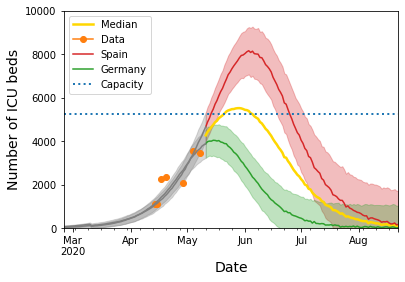

In [367]:
plot_scenarios(df1= df1_ICU, df2= df2_ICU, dfdata= df_ICU_data,
               country1= country1, country2= country2, ylim= 10000, capacity= 5274,  file_s= 'state_SP',
               Z= 1, save= False, pdf= False)

In [344]:
df1_ICU['n_mean_ICU']

date
2020-02-25     29.78
2020-02-26     31.31
2020-02-27     34.18
2020-02-28     35.61
2020-02-29     39.14
               ...  
2020-08-18     82.55
2020-08-19     84.84
2020-08-20    100.68
2020-08-21     65.10
2020-08-22     74.59
Name: n_mean_ICU, Length: 180, dtype: float64

In [335]:
len(df1_ICU[df1_ICU['n_mean_ICU'] > 5274].index.tolist()) 

0

In [332]:
df1_ICU[ 2.38*df1_ICU['n_mean_ICU'] > 5274 ].index.tolist()[0].strftime('%Y-%m-%d')

'2020-05-14'

In [82]:
df1_ICU['n_mean_ICU']

date
2020-02-25     29.78
2020-02-26     31.31
2020-02-27     34.18
2020-02-28     35.61
2020-02-29     39.14
               ...  
2020-08-18     82.55
2020-08-19     84.84
2020-08-20    100.68
2020-08-21     65.10
2020-08-22     74.59
Name: n_mean_ICU, Length: 180, dtype: float64

In [83]:
df2_ICU['n_mean_ICU']

date
2020-02-25    16.45
2020-02-26    17.50
2020-02-27    19.68
2020-02-28    21.10
2020-02-29    22.76
              ...  
2020-08-18    17.34
2020-08-19    26.00
2020-08-20    17.20
2020-08-21     3.89
2020-08-22    10.67
Name: n_mean_ICU, Length: 180, dtype: float64

In [84]:
df_ICU_data

,n_data_ICU
date,
2020-02-25,NaN
2020-02-26,NaN
2020-02-27,NaN
2020-02-28,NaN
2020-02-29,NaN
...,...
2020-08-18,NaN
2020-08-19,NaN
2020-08-20,NaN


In [87]:
len(df1_ICU['n_mean_ICU'])

180

In [144]:
2.3795927581516843* np.median([df1_ICU['n_mean_ICU'], df2_ICU['n_mean_ICU']], axis=0) < 5274

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [95]:
df_ICU_data['n_data_ICU']

date
2020-02-25    NaN
2020-02-26    NaN
2020-02-27    NaN
2020-02-28    NaN
2020-02-29    NaN
             ... 
2020-08-18    NaN
2020-08-19    NaN
2020-08-20    NaN
2020-08-21    NaN
2020-08-22    NaN
Name: n_data_ICU, Length: 180, dtype: object

In [96]:
df_ICU_data['n_data_ICU'].notnull()

date
2020-02-25    False
2020-02-26    False
2020-02-27    False
2020-02-28    False
2020-02-29    False
              ...  
2020-08-18    False
2020-08-19    False
2020-08-20    False
2020-08-21    False
2020-08-22    False
Name: n_data_ICU, Length: 180, dtype: bool

In [98]:
df_ICU_data[df_ICU_data['n_data_ICU'].notnull()].index

DatetimeIndex(['2020-04-14', '2020-04-15', '2020-04-17', '2020-04-20',
               '2020-04-29', '2020-05-04', '2020-05-08'],
              dtype='datetime64[ns]', name='date', freq=None)

In [101]:
df1_ICU_dates = df1_ICU.loc[df_ICU_data[df_ICU_data['n_data_ICU'].notnull()].index]
df2_ICU_dates = df1_ICU.loc[df_ICU_data[df_ICU_data['n_data_ICU'].notnull()].index]
df_ICU_data_dates = df_ICU_data.loc[df_ICU_data[df_ICU_data['n_data_ICU'].notnull()].index]

In [104]:
df_ICU_data_dates

,n_data_ICU
date,
2020-04-14,1111
2020-04-15,1132
2020-04-17,2275
2020-04-20,2345
2020-04-29,2088
2020-05-04,3534
2020-05-08,3474


In [107]:
median = np.median([df1_ICU_dates['n_mean_ICU'], df2_ICU_dates['n_mean_ICU']], axis=0)
median

array([ 456.72,  479.82,  545.42,  648.17, 1094.99, 1414.43, 1721.05])

In [ ]:
from scipy.optimize import minimize 
minimize(f, x0, args=(a, b, c))

In [110]:
((df_ICU_data_dates['n_data_ICU'] - median)**2).sum()


15275579.643599996

In [111]:
def error(x):

    median = np.median([df1_ICU_dates['n_mean_ICU'], df2_ICU_dates['n_mean_ICU']], axis=0)
    f = ((df_ICU_data_dates['n_data_ICU'] - x*median)**2).sum()

    return f

In [113]:
from scipy.optimize import minimize 

minimize(error, x0=100)

      fun: 2266343.6072461912
 hess_inv: array([[6.82521619e-08]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 5
     njev: 14
   status: 0
  success: True
        x: array([2.33330045])

In [120]:
minimize(error, x0=100).x[0]

2.333300450900617